# Ejemplos de notworkx

En esta libreta voy a poner ejemplos del uso de la biblioteca *networkx*.
Primero instalaremos networkx en este codespace.

In [3]:
! pip install networkx


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
import networkx as nx

Este codigo hace la grafica de G

In [5]:
G = nx.Graph()
G.add_edge("A", "B", weight=4)
G.add_edge("B", "D", weight=2)
G.add_edge("A", "C", weight=3)
G.add_edge("C", "D", weight=4)
nx.shortest_path(G, "A", "D", weight="weight")
['A', 'B', 'D']

['A', 'B', 'D']

A continuacion se hará la grafica. Primero se instala la biblioteca *matplotlib*

In [7]:
! pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 49.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 47.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 53.2 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 56.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [matplotlib]8 [matplotlib]

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


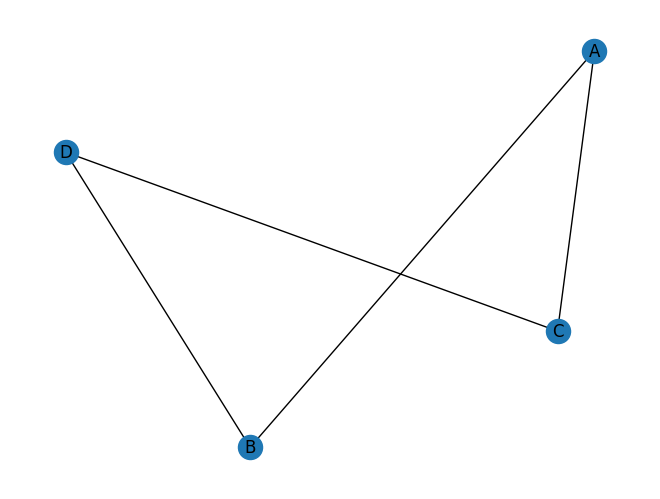

In [10]:
nx.draw(G, with_labels=True)

The route of the traveller is: [0, 4, 19, 12, 2, 7, 10, 18, 5, 13, 6, 11, 3, 16, 17, 15, 14, 8, 9, 1, 0]


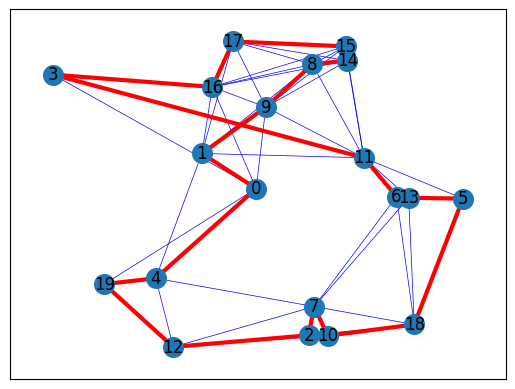

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.approximation as nx_app
import math

G = nx.random_geometric_graph(20, radius=0.4, seed=3)
pos = nx.get_node_attributes(G, "pos")

# Depot should be at (0,0)
pos[0] = (0.5, 0.5)

H = G.copy()


# Calculating the distances between the nodes as edge's weight.
for i in range(len(pos)):
    for j in range(i + 1, len(pos)):
        dist = math.hypot(pos[i][0] - pos[j][0], pos[i][1] - pos[j][1])
        dist = dist
        G.add_edge(i, j, weight=dist)

cycle = nx_app.christofides(G, weight="weight")
edge_list = list(nx.utils.pairwise(cycle))

# Draw closest edges on each node only
nx.draw_networkx_edges(H, pos, edge_color="blue", width=0.5)

# Draw the route
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,
)

print("The route of the traveller is:", cycle)
plt.show()

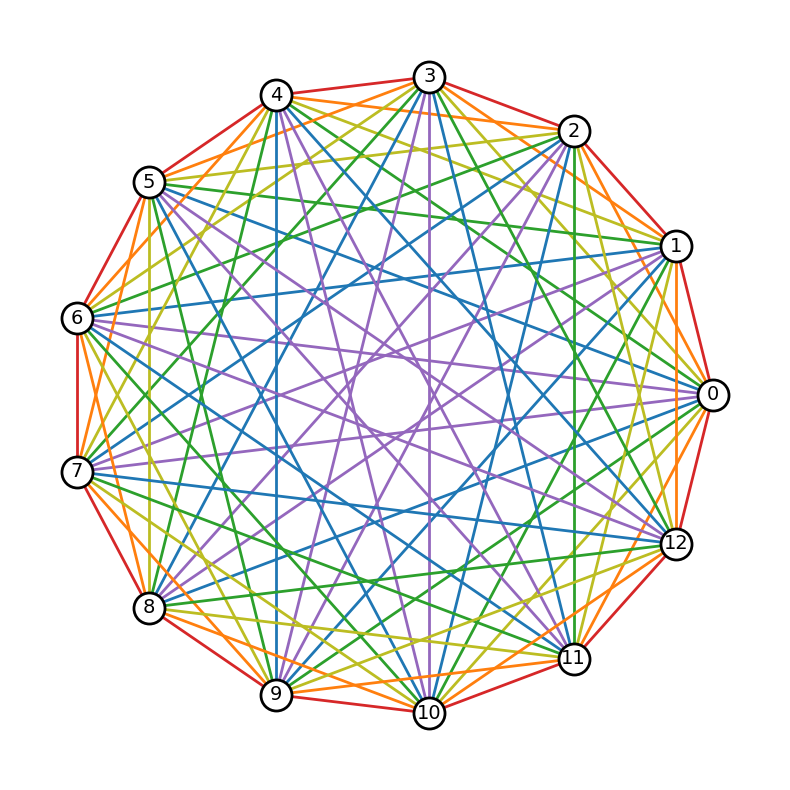

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

# A rainbow color mapping using matplotlib's tableau colors
node_dist_to_color = {
    1: "tab:red",
    2: "tab:orange",
    3: "tab:olive",
    4: "tab:green",
    5: "tab:blue",
    6: "tab:purple",
}

# Create a complete graph with an odd number of nodes
nnodes = 13
G = nx.complete_graph(nnodes)

# A graph with (2n + 1) nodes requires n colors for the edges
n = (nnodes - 1) // 2
ndist_iter = list(range(1, n + 1))

# Take advantage of circular symmetry in determining node distances
ndist_iter += ndist_iter[::-1]


def cycle(nlist, n):
    return nlist[-n:] + nlist[:-n]


# Rotate nodes around the circle and assign colors for each edge based on
# node distance
nodes = list(G.nodes())
for i, nd in enumerate(ndist_iter):
    for u, v in zip(nodes, cycle(nodes, i + 1)):
        G[u][v]["color"] = node_dist_to_color[nd]

pos = nx.circular_layout(G)
# Create a figure with 1:1 aspect ratio to preserve the circle.
fig, ax = plt.subplots(figsize=(8, 8))
node_opts = {"node_size": 500, "node_color": "w", "edgecolors": "k", "linewidths": 2.0}
nx.draw_networkx_nodes(G, pos, **node_opts)
nx.draw_networkx_labels(G, pos, font_size=14)
# Extract color from edge data
edge_colors = [edgedata["color"] for _, _, edgedata in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=2.0, edge_color=edge_colors)

ax.set_axis_off()
fig.tight_layout()
plt.show()